In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)




In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('kidney_disease.csv')

#print the first 5 rows
df.head()

Saving kidney_disease.csv to kidney_disease.csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
#Get the shape of the data (the no of rows & colms)
df.shape

(400, 26)

In [ ]:
# dropping id column
df.drop('id', axis = 1, inplace = True)

In [ ]:
# rename column names to make it more user-friendly
df.columns = ['age',
                'blood_pressure',
                'specific_gravity',
                'albumin',
                'sugar',
                'red_blood_cells',
                'pus_cell',
                'pus_cell_clumps',
                'bacteria',
                'blood_glucose_random',
                'blood_urea',
                'serum_creatinine',
                'sodium',
                'potassium',
                'haemoglobin',
                'packed_cell_volume',
                'white_blood_cell_count',
                'red_blood_cell_count',
                'hypertension',
                'diabetes_mellitus',
                'coronary_artery_disease',
                'appetite',
                'peda_edema',
                'aanemia',
                'classification'
               ]

In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
# converting necessary columns to numerical type
df['packed_cell_volume']     = pd.to_numeric(df['packed_cell_volume']    , errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count']   = pd.to_numeric(df['red_blood_cell_count']  , errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
# Extracting categorical and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [ ]:
# looking at unique values in categorical columns
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

classification has ['ckd' 'ckd\t' 'notckd'] values



In [ ]:
# replace incorrect values
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
df['coronary_artery_disease'].replace(to_replace ={'\tno':'no'},inplace=True)
df['classification'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'},inplace=True)

In [ ]:
#converting the values in the 'classification' column of the DataFrame  into numeric format
df['classification'] = df['classification'].map({'ckd': 0, 'not ckd': 1})
df['classification'] = pd.to_numeric(df['classification'], errors='coerce')

In [ ]:
#print unique values present in each of the specified columns
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'classification']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

classification has [0 1] values



## **DATA ANALYSIS**



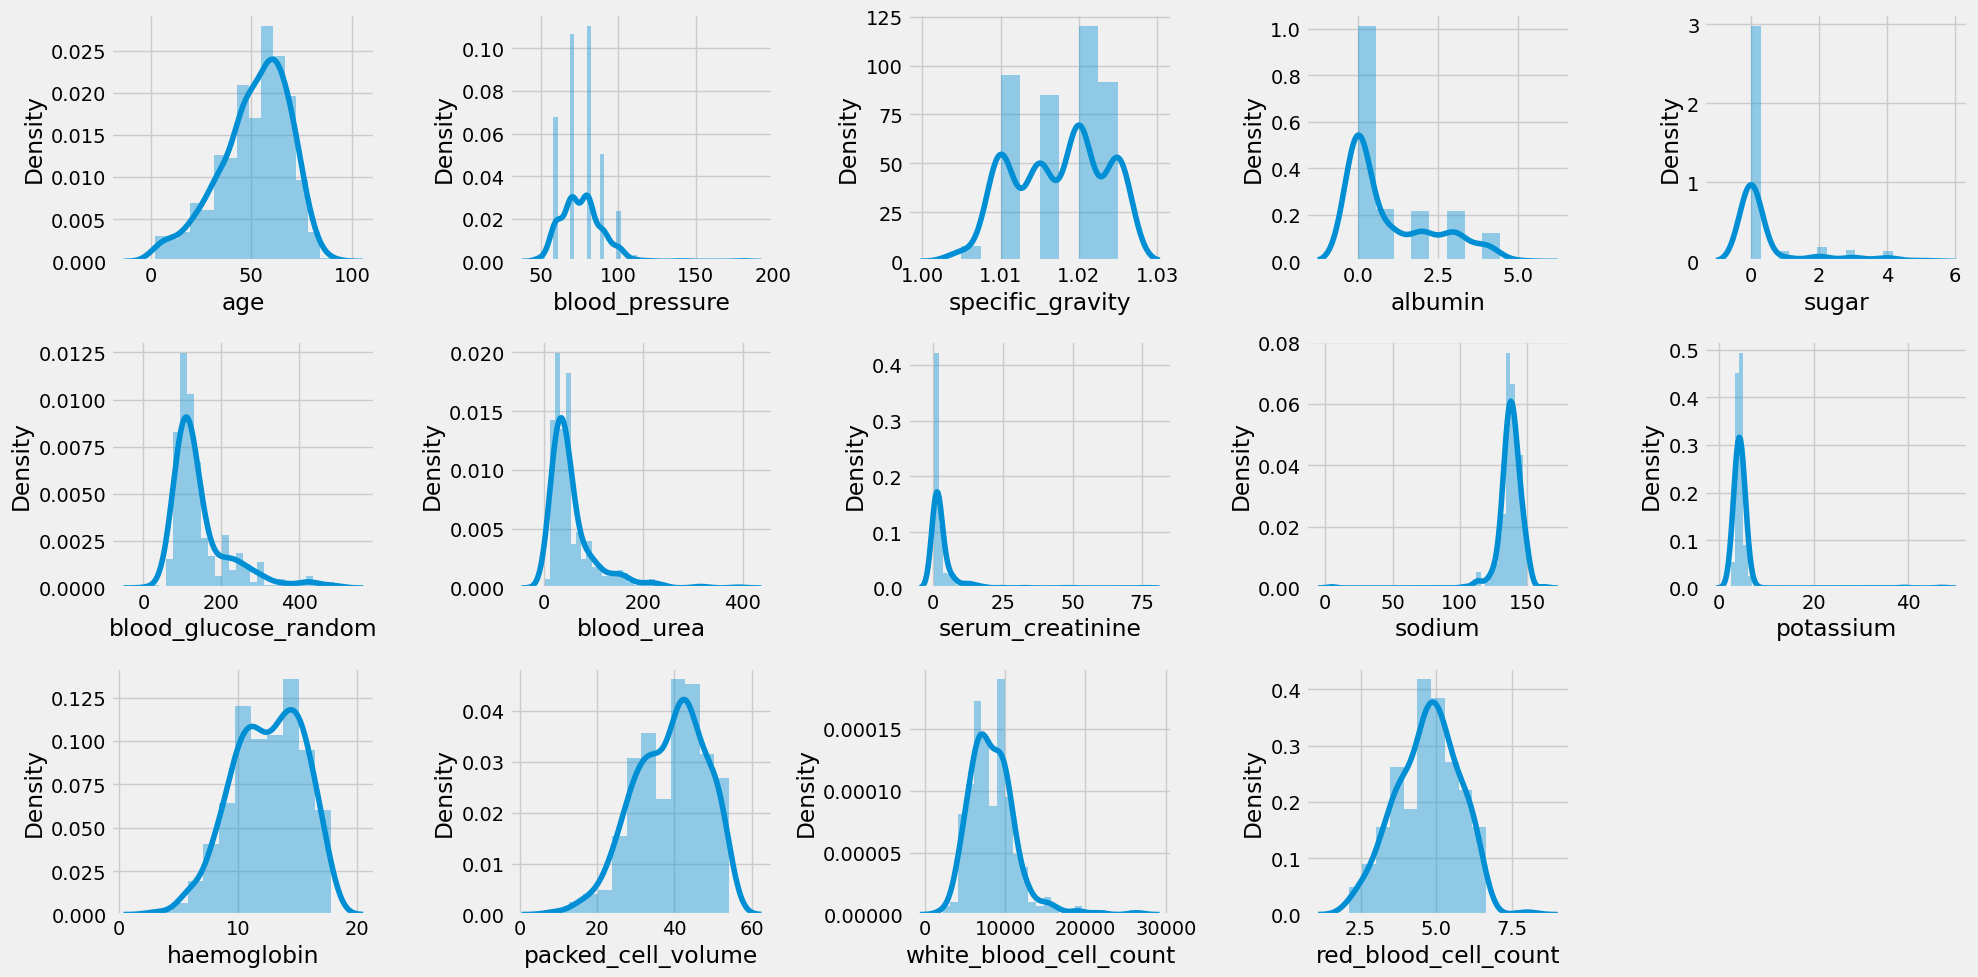

In [ ]:
# checking numerical features distribution

plt.figure(figsize = (20,10))
plot_number = 1

for column in num_cols:
    if plot_number <= 14:
        ax = plt.subplot(3, 5, plot_number)
        sns.distplot(df[column])
        plt.xlabel(column)

    plot_number += 1

plt.tight_layout()
plt.show()

In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,0


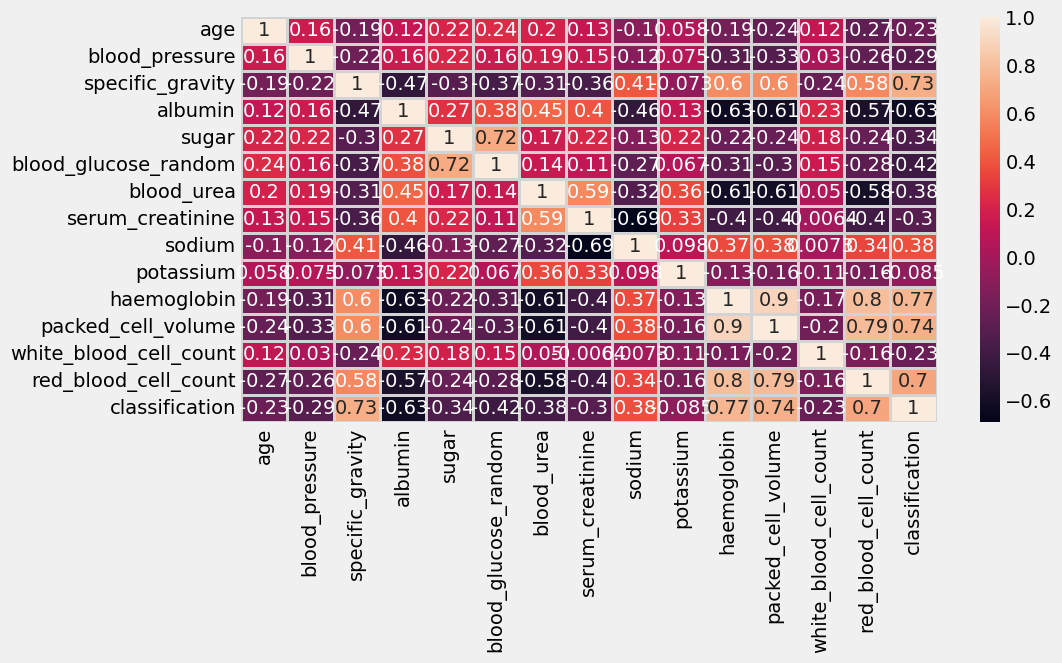

In [ ]:
# heatmap of data

plt.figure(figsize = (10,5))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [ ]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'classification'],
      dtype='object')

In [ ]:
# defining functions to create plot

def violin(col):
    fig = px.violin(df, y=col, x="classification", color="classification", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="classification", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="classification", template = 'plotly_dark')
    return fig.show()

In [ ]:
violin('red_blood_cell_count')

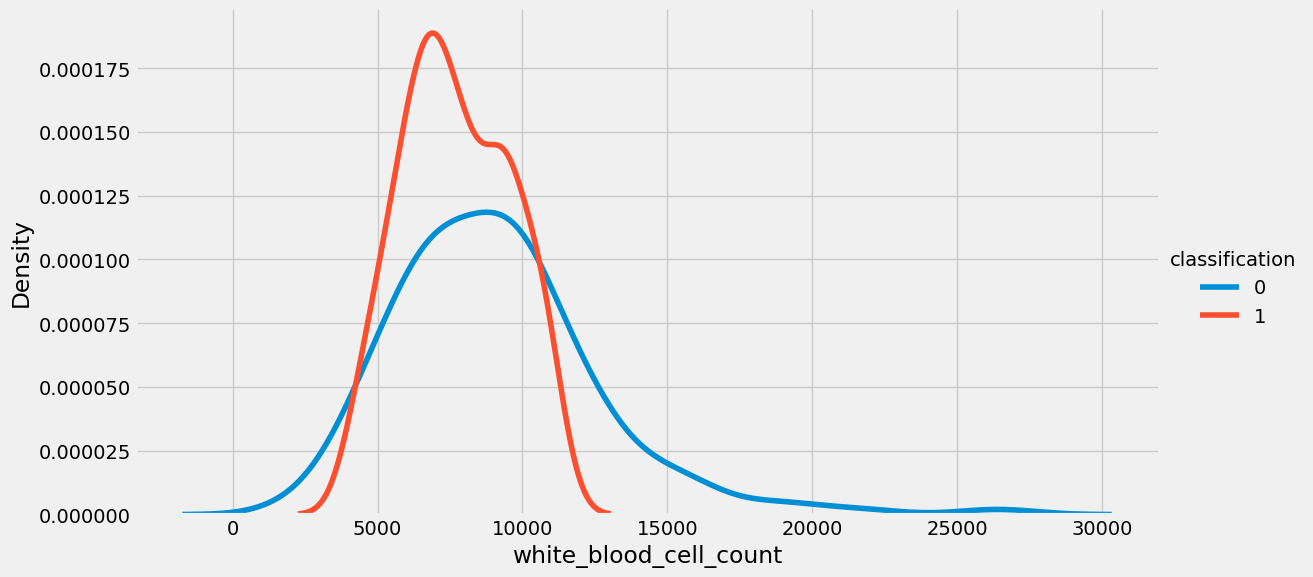

In [ ]:
kde('white_blood_cell_count')

# **Data Pre Processing**

In [ ]:
# checking for null values
df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
classification               0
dtype: int64

In [ ]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [ ]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
classification               0
dtype: int64

In [ ]:
# filling null values,  use two methods, random sampling for higher null values and
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample       = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [ ]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [ ]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [ ]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [ ]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
classification             0
dtype: int64

**Feature Selection**

In [ ]:
x=df[df.select_dtypes(['int', 'float']).columns]
y=df['classification']

In [ ]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

x_train = sc.fit_transform(x)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Apply sklearn ch2
ch2c=SelectKBest(score_func=chi2,k=10)
ch2c.fit(x_train,y)
features_score_pvalue=pd.DataFrame({"Score":ch2c.scores_,"P_Value":np.round(ch2c.pvalues_,5)},index=x.columns)
features_score_pvalue.nlargest(n=48,columns="Score")

,Score,P_Value
classification,250.000000,0.00000
albumin,46.313546,0.00000
specific_gravity,22.125950,0.00000
sugar,19.739505,0.00001
haemoglobin,11.125932,0.00085
packed_cell_volume,10.079143,0.00150
blood_glucose_random,7.433263,0.00640
blood_urea,6.536749,0.01057
red_blood_cell_count,6.410418,0.01135
serum_creatinine,5.394858,0.02020


**CHI SQUARE**

In [ ]:
x_cat=df[df.select_dtypes('float','int').columns]
x_cat['classification']=df['classification']

In [ ]:
from scipy import stats
def chi_squared(df,label,col_names,p_value = 0.05):

    '''perform chi-squared test for the numerical values in the input data frame
    Args:
       df: data frame that need to perform chi squared test
       label: label or independant variable
       col_names : col_names need to perform chi squared testing
       p-value: Level of significance to reject the null hypothesis
    Returns:
       df: data frame with variable, P-value and the conclusion based on level of significance
    '''
    value = df[label].unique()[1]

    df_test = pd.DataFrame( columns=['VARIABLE','P-VALUE','CONCLUSION'])

    for i in list(col_names):

        g, p, dof, expctd = stats.chi2_contingency(pd.crosstab(df[i],df[label], rownames=[i], colnames=[label]))


        df_test = df_test.append({'VARIABLE': str(i), 'P-VALUE': str(round(p,4)),
                                  'CONCLUSION': np.where(p >= p_value,'Do Not Reject H0','Reject H0')}, ignore_index=True)



    return df_test

In [ ]:
chi_squared=chi_squared(x_cat,'classification',x_cat.columns)
chi_squared["P-VALUE"] = pd.to_numeric(chi_squared["P-VALUE"])
chi_squared.nlargest(n=48,columns="P-VALUE")

,VARIABLE,P-VALUE,CONCLUSION
12,white_blood_cell_count,0.6447,Do Not Reject H0
5,blood_glucose_random,0.1808,Do Not Reject H0
6,blood_urea,0.0384,Reject H0
0,age,0.0039,Reject H0
1,blood_pressure,0.0000,Reject H0
2,specific_gravity,0.0000,Reject H0
3,albumin,0.0000,Reject H0
4,sugar,0.0000,Reject H0
7,serum_creatinine,0.0000,Reject H0
8,sodium,0.0000,Reject H0


# **Feature Encoding**

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

classification has 2 categories



In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,132.0,5.0,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,75.0,18.0,0.8,134.0,3.5,11.3,38.0,6000.0,5.0,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,135.0,3.9,9.6,31.0,7500.0,5.8,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,142.0,4.2,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [ ]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells              int64
pus_cell                     int64
pus_cell_clumps              int64
bacteria                     int64
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                 int64
diabetes_mellitus            int64
coronary_artery_disease      int64
appetite                     int64
peda_edema                   int64
aanemia                      int64
classification               int64
dtype: object

# **Model Building**

In [ ]:
ind_col = [col for col in df.columns if col != 'classification']
dep_col = 'classification'

X = df[ind_col]
Y = df[dep_col]

In [ ]:
print('X axis: '+ str(X))
print('')
print('Y axis: '+ str(Y))

X axis:       age  blood_pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0    48.0            80.0             1.020      1.0    0.0                1   
1     7.0            50.0             1.020      4.0    0.0                1   
2    62.0            80.0             1.010      2.0    3.0                1   
3    48.0            70.0             1.005      4.0    0.0                1   
4    51.0            80.0             1.010      2.0    0.0                1   
..    ...             ...               ...      ...    ...              ...   
395  55.0            80.0             1.020      0.0    0.0                1   
396  42.0            70.0             1.025      0.0    0.0                1   
397  12.0            80.0             1.020      0.0    0.0                1   
398  17.0            60.0             1.025      0.0    0.0                1   
399  58.0            80.0             1.025      0.0    0.0                1   

     pus_cell  pus_cell_clumps 

In [ ]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30, random_state = 42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

**FEATURE SCALING**

In [ ]:
# data normalization with sklearn
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train.shape

(280, 24)

In [ ]:
!pip install catboost
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, f1_score


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.3 MB/s eta 0:00:00


In [ ]:
# Importing modelling libraries
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.calibration import CalibratedClassifierCV

**TRAIN ALL CLASSIFICATION MODELS**

**BUILD MODELS**

In [ ]:
r=26
DTclassifier = DecisionTreeClassifier(criterion = 'entropy',random_state=r)
XGBoostclassifier = XGBClassifier()
RandomForestclassifier = RandomForestClassifier(criterion = 'entropy')
SVMclassifier = SVC(kernel='rbf',probability=True)
LOGISTICclassifier = LogisticRegression()
KNNclassifier = KNeighborsClassifier()
GNBclassifier = GaussianNB()
NeuralNetworkClassifier= MLPClassifier(random_state=r)
CatBoost = CatBoostClassifier(random_state=r,verbose = False)
GBM = GradientBoostingClassifier(random_state=r)

**FITTING MODELS**

In [ ]:
DTclassifier.fit(x_train, y_train)
XGBoostclassifier.fit(x_train, y_train)
RandomForestclassifier.fit(x_train, y_train)
SVMclassifier.fit(x_train, y_train)
LOGISTICclassifier.fit(x_train, y_train)
KNNclassifier.fit(x_train, y_train)
GNBclassifier.fit(x_train, y_train)
CatBoost.fit(x_train, y_train)
GBM.fit(x_train, y_train)

GradientBoostingClassifier(random_state=26)

**PREDICT MODELS**

In [ ]:
DTpred = DTclassifier.predict(x_test)
XGBpred = XGBoostclassifier.predict(x_test)
RFpred = RandomForestclassifier.predict(x_test)
SVMpred = SVMclassifier.predict(x_test)
LOGISTICpred = LOGISTICclassifier.predict(x_test)
KNNpred = KNNclassifier.predict(x_test)
GNBpred = GNBclassifier.predict(x_test)
CatBoostpred= CatBoost.predict(x_test)
GBMpred= GBM.predict(x_test)

**PRINT ACCURACY SCORE DOR ALL MODELS**

In [ ]:
DTaccuracy = accuracy_score(y_test, DTpred)
print("Accuracy of the Decision Tree Classifier: ",DTaccuracy)

XGBaccuracy = accuracy_score(y_test, XGBpred)
print("Accuracy of the XGBoost Classifier: ",XGBaccuracy)

RFaccuracy = accuracy_score(y_test, RFpred)
print("Accuracy of the Random Forest Classifier: ",RFaccuracy)

SVMaccuracy = accuracy_score(y_test, SVMpred)
print("Accuracy of the SVM classifier: ",SVMaccuracy)

LOGISTICaccuracy = accuracy_score(y_test, LOGISTICpred)
print("Accuracy of the Logistic Regression Classifier: ",LOGISTICaccuracy)

KNNaccuracy = accuracy_score(y_test, KNNpred)
print("Accuracy of the KNN Classifier: ",KNNaccuracy)

GNBaccuracy = accuracy_score(y_test, GNBpred)
print("Accuracy of the GNB Classifier: ", GNBaccuracy)

CatBoostaccuracy = accuracy_score(y_test, CatBoostpred)
print("Accuracy of the CatBoost Classifier: ", CatBoostaccuracy)

GBMaccuracy = accuracy_score(y_test, GBMpred)
print("Accuracy of the GBM Classifier: ", GBMaccuracy)

Accuracy of the Decision Tree Classifier:  0.9916666666666667
Accuracy of the XGBoost Classifier:  0.9916666666666667
Accuracy of the Random Forest Classifier:  0.9916666666666667
Accuracy of the SVM classifier:  0.9916666666666667
Accuracy of the Logistic Regression Classifier:  0.9916666666666667
Accuracy of the KNN Classifier:  0.9583333333333334
Accuracy of the GNB Classifier:  0.9416666666666667
Accuracy of the CatBoost Classifier:  0.9916666666666667
Accuracy of the GBM Classifier:  0.9916666666666667


In [ ]:
DT_f1_score = f1_score(y_test, DTpred)
print("_f1_score of the Decision Tree Classifier: ",DT_f1_score)

XGB_f1_score = f1_score(y_test, XGBpred)
print("_f1_score of the XGBoost Classifier: ",XGB_f1_score)

RF_f1_score = f1_score(y_test, RFpred)
print("_f1_score of the Random Forest Classifier: ",RF_f1_score)

SVM_f1_score = f1_score(y_test, SVMpred)
print("_f1_score of the SVM classifier: ",SVM_f1_score)

LOGISTIC_f1_score = f1_score(y_test, LOGISTICpred)
print("_f1_score of the Logistic Regression Classifier: ",LOGISTIC_f1_score)

KNN_f1_score = f1_score(y_test, KNNpred)
print("_f1_score of the KNN Classifier: ",KNN_f1_score)

GNB_f1_score = f1_score(y_test, GNBpred)
print("_f1_score of the GNB Classifier: ", GNB_f1_score)

CatBoost_f1_score = f1_score(y_test, CatBoostpred)
print("_f1_score of the CatBoost Classifier: ", CatBoost_f1_score)

GBM_f1_score= f1_score(y_test, GBMpred)
print("_f1_score of the GBM Classifier: ", GBM_f1_score)

_f1_score of the Decision Tree Classifier:  0.9885057471264368
_f1_score of the XGBoost Classifier:  0.9887640449438202
_f1_score of the Random Forest Classifier:  0.9887640449438202
_f1_score of the SVM classifier:  0.9887640449438202
_f1_score of the Logistic Regression Classifier:  0.9887640449438202
_f1_score of the KNN Classifier:  0.9462365591397849
_f1_score of the GNB Classifier:  0.9263157894736842
_f1_score of the CatBoost Classifier:  0.9887640449438202
_f1_score of the GBM Classifier:  0.9887640449438202


In [ ]:
from sklearn.metrics import precision_score

DT_precision = precision_score(y_test, DTpred)
print("Precision of the Decision Tree Classifier: ", DT_precision)

XGB_precision = precision_score(y_test, XGBpred)
print("Precision of the XGBoost Classifier: ", XGB_precision)

RF_precision = precision_score(y_test, RFpred)
print("Precision of the Random Forest Classifier: ", RF_precision)

SVM_precision = precision_score(y_test, SVMpred)
print("Precision of the SVM classifier: ", SVM_precision)

LOGISTIC_precision = precision_score(y_test, LOGISTICpred)
print("Precision of the Logistic Regression Classifier: ", LOGISTIC_precision)

KNN_precision = precision_score(y_test, KNNpred)
print("Precision of the KNN Classifier: ", KNN_precision)

GNB_precision = precision_score(y_test, GNBpred)
print("Precision of the GNB Classifier: ", GNB_precision)

CatBoost_precision = precision_score(y_test, CatBoostpred)
print("Precision of the CatBoost Classifier: ", CatBoost_precision)

GBMa_precision = precision_score(y_test, GBMpred)
print("Precision of the GBM Classifier: ", GBMa_precision)

Precision of the Decision Tree Classifier:  1.0
Precision of the XGBoost Classifier:  0.9777777777777777
Precision of the Random Forest Classifier:  0.9777777777777777
Precision of the SVM classifier:  0.9777777777777777
Precision of the Logistic Regression Classifier:  0.9777777777777777
Precision of the KNN Classifier:  0.8979591836734694
Precision of the GNB Classifier:  0.8627450980392157
Precision of the CatBoost Classifier:  0.9777777777777777
Precision of the GBM Classifier:  0.9777777777777777


In [ ]:
from sklearn.metrics import recall_score

DT_recall = recall_score(y_test, DTpred)
print("Recall of the Decision Tree Classifier: ", DT_recall)

XGB_recall = recall_score(y_test, XGBpred)
print("Recall of the XGBoost Classifier: ", XGB_recall)

RF_recall = recall_score(y_test, RFpred)
print("Recall of the Random Forest Classifier: ", RF_recall)

SVM_recall = recall_score(y_test, SVMpred)
print("Recall of the SVM classifier: ", SVM_recall)

LOGISTIC_recall = recall_score(y_test, LOGISTICpred)
print("Recall of the Logistic Regression Classifier: ", LOGISTIC_recall)

KNN_recall = recall_score(y_test, KNNpred)
print("Recall of the KNN Classifier: ", KNN_recall)

GNB_recall = recall_score(y_test, GNBpred)
print("Recall of the GNB Classifier: ", GNB_recall)

CatBoost_recall = recall_score(y_test, CatBoostpred)
print("Recall of the CatBoost Classifier: ", CatBoost_recall)

GBMa_recall = recall_score(y_test, GBMpred)
print("Recall of the GBM Classifier: ", GBMa_recall)

Recall of the Decision Tree Classifier:  0.9772727272727273
Recall of the XGBoost Classifier:  1.0
Recall of the Random Forest Classifier:  1.0
Recall of the SVM classifier:  1.0
Recall of the Logistic Regression Classifier:  1.0
Recall of the KNN Classifier:  1.0
Recall of the GNB Classifier:  1.0
Recall of the CatBoost Classifier:  1.0
Recall of the GBM Classifier:  1.0


**CONFUSION MATRIX & cLASSIFICATION REPORTS**

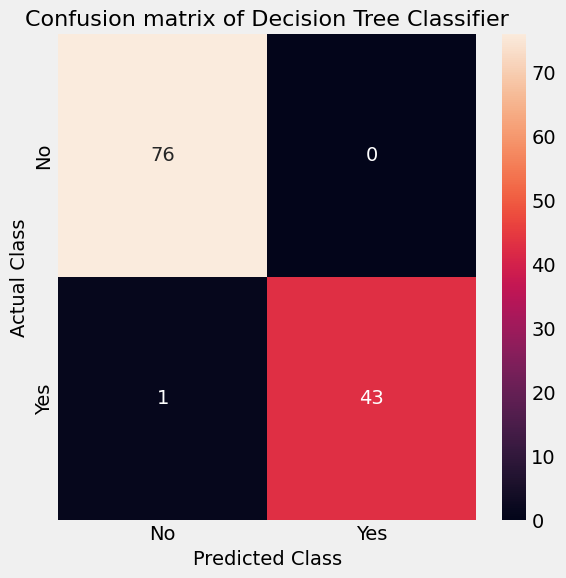

In [ ]:
#CMDecisionTree = confusion_matrix(y_test,DTpred)
#CMDecisionTree

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, DTpred)

#Plot the Confusion Matrix
LABELS = ['No', 'Yes']
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix of Decision Tree Classifier',size = 16)
plt.ylabel('Actual Class',size = 14)
plt.xlabel('Predicted Class',size = 14)
plt.show()

In [ ]:
#Array formatted Confusion matrix
Predicted = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Diseased','Healthy')),
categories = ['Diseased','Healthy'])
Actual = pd.Categorical(list(np.where(np.array(DTpred) == 1, 'Diseased','Healthy')),
categories = ['Diseased','Healthy'])

pd.crosstab(Actual, Predicted,
            rownames=['Predicted Class'],
            colnames=['Actual Class'], margins=True, margins_name="Total Amount")

Actual Class,Diseased,Healthy,Total Amount
Predicted Class,,,
Diseased,43,0,43
Healthy,1,76,77
Total Amount,44,76,120


In [ ]:
print(classification_report(y_test, DTpred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.98      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



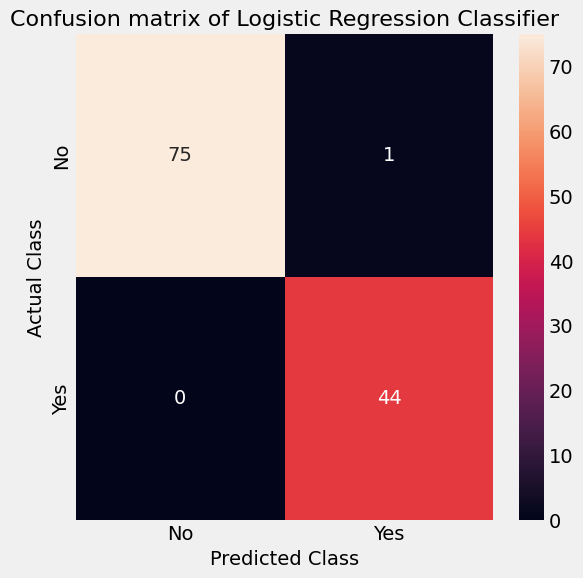

In [ ]:
#CMLOGISTIC = confusion_matrix(y_test,LOGISTICpred)
#CMLOGISTIC

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, LOGISTICpred)

#Plot the Confusion Matrix
LABELS = ['No', 'Yes']
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix of Logistic Regression Classifier',size = 16)
plt.ylabel('Actual Class',size = 14)
plt.xlabel('Predicted Class',size = 14)
plt.show()

In [ ]:
#Array formatted Confusion matrix
Predicted = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Diseased','Healthy')),
categories = ['Diseased','Healthy'])
Actual = pd.Categorical(list(np.where(np.array(LOGISTICpred) == 1, 'Diseased','Healthy')),
categories = ['Diseased','Healthy'])

pd.crosstab(Actual, Predicted,
            rownames=['Predicted Class'],
            colnames=['Actual Class'], margins=True, margins_name="Total Amount")

Actual Class,Diseased,Healthy,Total Amount
Predicted Class,,,
Diseased,44,1,45
Healthy,0,75,75
Total Amount,44,76,120


In [ ]:
print(classification_report(y_test, LOGISTICpred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.98      1.00      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



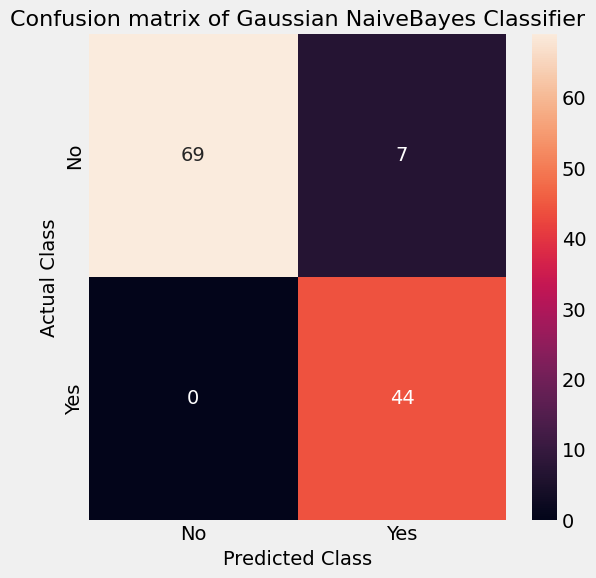

In [ ]:
#CMnb = confusion_matrix(y_test,GNBpred)
#CMnb

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, GNBpred)

#Plot the Confusion Matrix
LABELS = ['No', 'Yes']
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix of Gaussian NaiveBayes Classifier',size = 16)
plt.ylabel('Actual Class',size = 14)
plt.xlabel('Predicted Class',size = 14)
plt.show()

In [ ]:
#Array formatted Confusion matrix
Predicted = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Diseased','Healthy')),
categories = ['Diseased','Healthy'])
Actual = pd.Categorical(list(np.where(np.array(GNBpred) == 1, 'Diseased','Healthy')),
categories = ['Diseased','Healthy'])

pd.crosstab(Actual, Predicted,
            rownames=['Predicted Class'],
            colnames=['Actual Class'], margins=True, margins_name="Total Amount")

Actual Class,Diseased,Healthy,Total Amount
Predicted Class,,,
Diseased,44,7,51
Healthy,0,69,69
Total Amount,44,76,120


In [ ]:
print(classification_report(y_test, GNBpred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        76
           1       0.86      1.00      0.93        44

    accuracy                           0.94       120
   macro avg       0.93      0.95      0.94       120
weighted avg       0.95      0.94      0.94       120



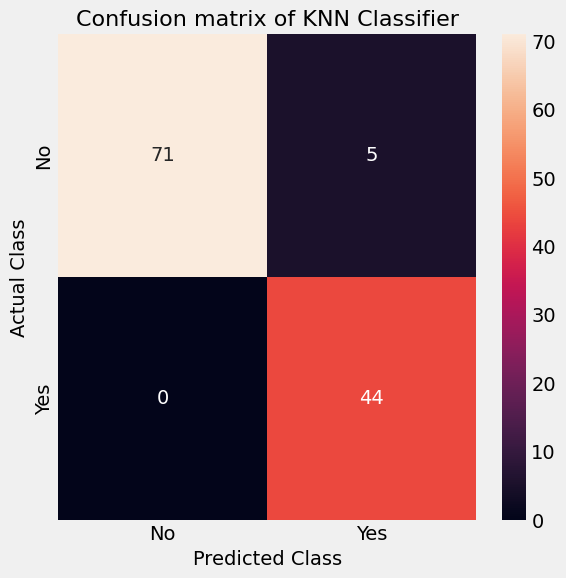

In [ ]:
#CMknn = confusion_matrix(y_test,KNNpred)
#CMknn

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, KNNpred)

#Plot the Confusion Matrix
LABELS = ['No', 'Yes']
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix of KNN Classifier',size = 16)
plt.ylabel('Actual Class',size = 14)
plt.xlabel('Predicted Class',size = 14)
plt.show()

In [ ]:
#Array formatted Confusion matrix
Predicted = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Diseased','Healthy')),
categories = ['Diseased','Healthy'])
Actual = pd.Categorical(list(np.where(np.array(KNNpred) == 1, 'Diseased','Healthy')),
categories = ['Diseased','Healthy'])

pd.crosstab(Actual, Predicted,
            rownames=['Predicted Class'],
            colnames=['Actual Class'], margins=True, margins_name="Total Amount")

Actual Class,Diseased,Healthy,Total Amount
Predicted Class,,,
Diseased,44,5,49
Healthy,0,71,71
Total Amount,44,76,120


In [ ]:
print(classification_report(y_test, KNNpred))


              precision    recall  f1-score   support

           0       1.00      0.93      0.97        76
           1       0.90      1.00      0.95        44

    accuracy                           0.96       120
   macro avg       0.95      0.97      0.96       120
weighted avg       0.96      0.96      0.96       120



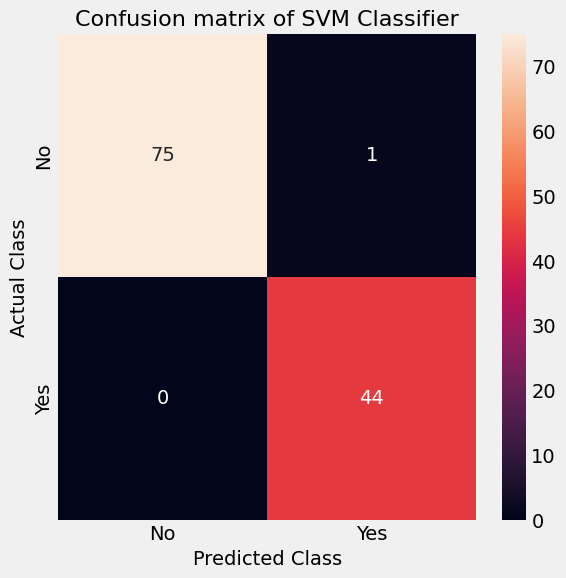

In [ ]:
#CMsvm = confusion_matrix(y_test,SVMpred)
#CMsvm

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, SVMpred)

#Plot the Confusion Matrix
LABELS = ['No', 'Yes']
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix of SVM Classifier',size = 16)
plt.ylabel('Actual Class',size = 14)
plt.xlabel('Predicted Class',size = 14)
plt.show()

In [ ]:
#Array formatted Confusion matrix
Predicted = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Diseased','Healthy')),
categories = ['Diseased','Healthy'])
Actual = pd.Categorical(list(np.where(np.array(SVMpred) == 1, 'Diseased','Healthy')),
categories = ['Diseased','Healthy'])

pd.crosstab(Actual, Predicted,
            rownames=['Predicted Class'],
            colnames=['Actual Class'], margins=True, margins_name="Total Amount")

Actual Class,Diseased,Healthy,Total Amount
Predicted Class,,,
Diseased,44,1,45
Healthy,0,75,75
Total Amount,44,76,120


In [ ]:
print(classification_report(y_test, SVMpred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.98      1.00      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



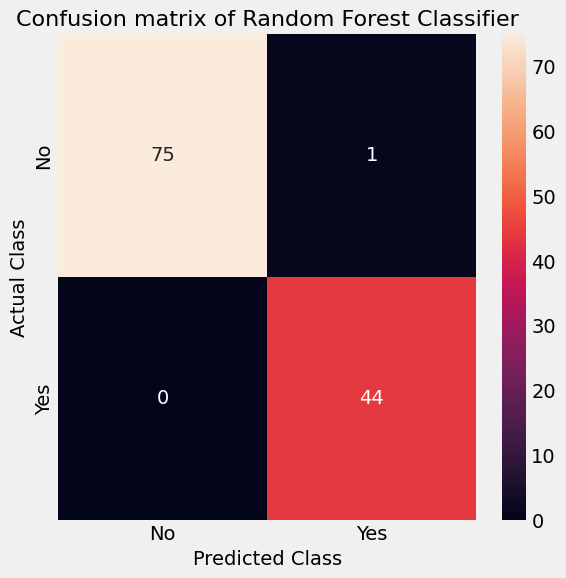

In [ ]:
cmRF = confusion_matrix(y_test,RFpred)
cmRF

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, RFpred)

#Plot the Confusion Matrix
LABELS = ['No', 'Yes']
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix of Random Forest Classifier',size = 16)
plt.ylabel('Actual Class',size = 14)
plt.xlabel('Predicted Class',size = 14)
plt.show()

In [ ]:
#Array formatted Confusion matrix
Predicted = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Diseased','Healthy')),
categories = ['Diseased','Healthy'])
Actual = pd.Categorical(list(np.where(np.array(RFpred) == 1, 'Diseased','Healthy')),
categories = ['Diseased','Healthy'])

pd.crosstab(Actual, Predicted,
            rownames=['Predicted Class'],
            colnames=['Actual Class'], margins=True, margins_name="Total Amount")

Actual Class,Diseased,Healthy,Total Amount
Predicted Class,,,
Diseased,44,1,45
Healthy,0,75,75
Total Amount,44,76,120


In [ ]:
print(classification_report(y_test, RFpred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.98      1.00      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



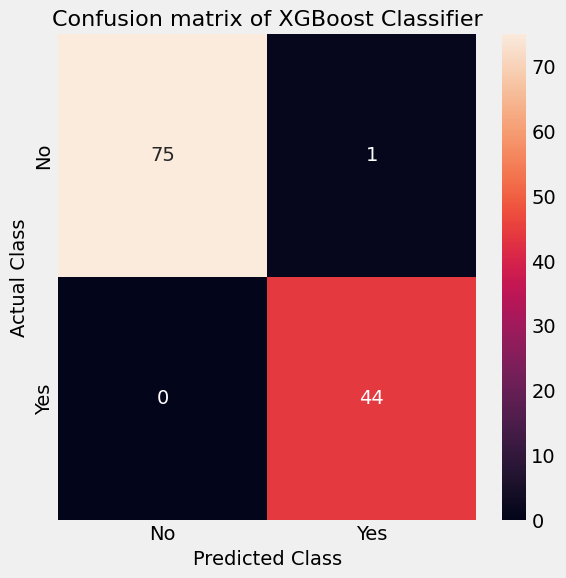

In [ ]:
cmXGB = confusion_matrix(y_test,XGBpred)
cmXGB

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, XGBpred)

#Plot the Confusion Matrix
LABELS = ['No', 'Yes']
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix of XGBoost Classifier',size = 16)
plt.ylabel('Actual Class',size = 14)
plt.xlabel('Predicted Class',size = 14)
plt.show()

In [ ]:
#Array formatted Confusion matrix
Predicted = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Diseased','Healthy')),
categories = ['Diseased','Healthy'])
Actual = pd.Categorical(list(np.where(np.array(XGBpred) == 1, 'Diseased','Healthy')),
categories = ['Diseased','Healthy'])

pd.crosstab(Actual, Predicted,
            rownames=['Predicted Class'],
            colnames=['Actual Class'], margins=True, margins_name="Total Amount")

Actual Class,Diseased,Healthy,Total Amount
Predicted Class,,,
Diseased,44,1,45
Healthy,0,75,75
Total Amount,44,76,120


In [ ]:
print(classification_report(y_test, XGBpred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.98      1.00      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



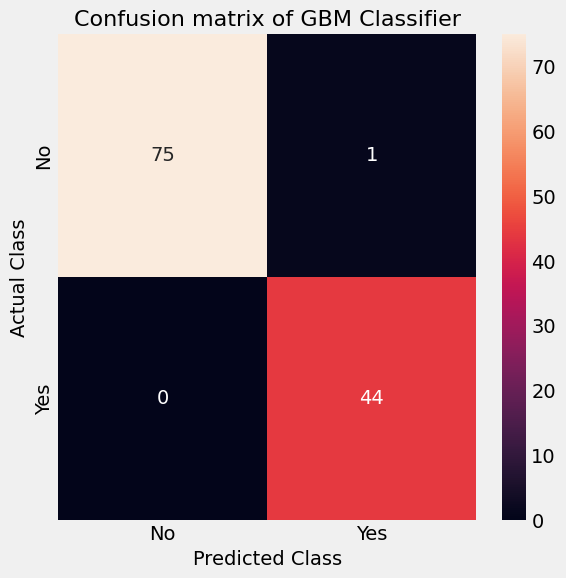

In [ ]:
cmGBM = confusion_matrix(y_test,GBMpred)
cmGBM

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, GBMpred)

#Plot the Confusion Matrix
LABELS = ['No', 'Yes']
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix of GBM Classifier',size = 16)
plt.ylabel('Actual Class',size = 14)
plt.xlabel('Predicted Class',size = 14)
plt.show()

In [ ]:
#Array formatted Confusion matrix
Predicted = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Diseased','Healthy')),
categories = ['Diseased','Healthy'])
Actual = pd.Categorical(list(np.where(np.array(GBMpred) == 1, 'Diseased','Healthy')),
categories = ['Diseased','Healthy'])

pd.crosstab(Actual, Predicted,
            rownames=['Predicted Class'],
            colnames=['Actual Class'], margins=True, margins_name="Total Amount")

Actual Class,Diseased,Healthy,Total Amount
Predicted Class,,,
Diseased,44,1,45
Healthy,0,75,75
Total Amount,44,76,120


In [ ]:
print(classification_report(y_test, GBMpred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.98      1.00      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



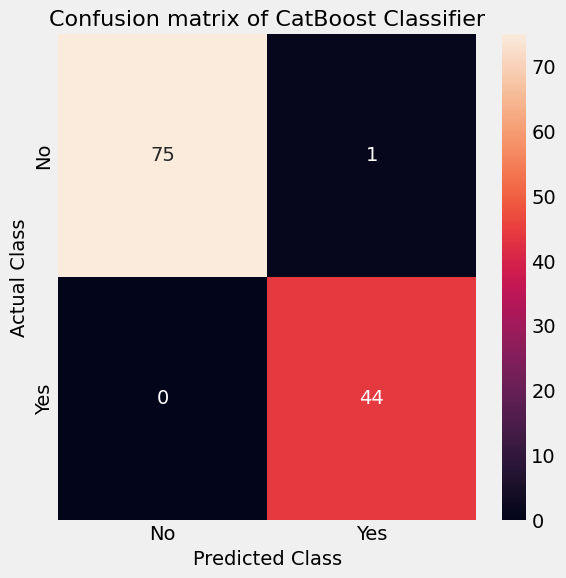

In [ ]:
cmCatBoost = confusion_matrix(y_test,CatBoostpred)
cmCatBoost

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, CatBoostpred)

#Plot the Confusion Matrix
LABELS = ['No', 'Yes']
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix of CatBoost Classifier',size = 16)
plt.ylabel('Actual Class',size = 14)
plt.xlabel('Predicted Class',size = 14)
plt.show()

In [ ]:
#Array formatted Confusion matrix
Predicted = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Diseased','Healthy')),
categories = ['Diseased','Healthy'])
Actual = pd.Categorical(list(np.where(np.array(CatBoostpred) == 1, 'Diseased','Healthy')),
categories = ['Diseased','Healthy'])

pd.crosstab(Actual, Predicted,
            rownames=['Predicted Class'],
            colnames=['Actual Class'], margins=True, margins_name="Total Amount")

Actual Class,Diseased,Healthy,Total Amount
Predicted Class,,,
Diseased,44,1,45
Healthy,0,75,75
Total Amount,44,76,120


In [ ]:
print(classification_report(y_test, CatBoostpred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        76
           1       0.98      1.00      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



**Applying K-Fold cross validation**

In [ ]:
accuracies = cross_val_score(estimator = DTclassifier, X = x_train, y = y_train, cv = 10)
print("Accuracy for Decision Tree: {:.2f} %".format(accuracies.mean()*100))

Accuracy for Decision Tree: 96.07 %


In [ ]:
accuracies1 = cross_val_score(estimator = LOGISTICclassifier, X = x_train, y = y_train)
print("Accuracy for Logistic Regression: {:.2f} %".format(accuracies1.mean()*100))

Accuracy for Logistic Regression: 95.36 %


In [ ]:
accuracies2 = cross_val_score(estimator = GNBclassifier, X = x_train, y = y_train, cv=10)
print("Accuracy for Gaussian NaiveBayes: {:.2f} %".format(accuracies2.mean()*100))

Accuracy for Gaussian NaiveBayes: 94.64 %


In [ ]:
accuracies3 = cross_val_score(estimator = KNNclassifier, X = x_train, y = y_train)
print("Accuracy for KNNClassifier: {:.2f} %".format(accuracies3.mean()*100))

Accuracy for KNNClassifier: 92.50 %


In [ ]:
accuracies5 = cross_val_score(estimator = SVMclassifier, X = x_train, y = y_train, cv=10)
print("Accuracy for SVM: {:.2f} %".format(accuracies5.mean()*100))

Accuracy for SVM: 95.36 %


In [ ]:
accuracies7 = cross_val_score(estimator = RandomForestclassifier, X = x_train, y = y_train, cv=10)
print("Accuracy for Random Forest : {:.2f} %".format(accuracies7.mean()*100))

Accuracy for Random Forest : 96.79 %


In [ ]:
accuracies8 = cross_val_score(estimator = XGBoostclassifier, X = x_train, y = y_train, cv=10)
print("Accuracy  for XGBoost Classifier: {:.2f} %".format(accuracies8.mean()*100))

Accuracy  for XGBoost Classifier: 95.36 %


In [ ]:
accuracies9 = cross_val_score(estimator = GBM, X = x_train, y = y_train)
print("Accuracy for GBM Classifier: {:.2f} %".format(accuracies9.mean()*100))

Accuracy for GBM Classifier: 95.00 %


In [ ]:
accuracies10 = cross_val_score(estimator = CatBoost, X = x_train, y = y_train)
print("Accuracy for CatBoost Classifier: {:.2f} %".format(accuracies10.mean()*100))

Accuracy for CatBoost Classifier: 95.71 %


**CatBoost Classifier - Global Feature Importance**

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

In [ ]:
# load JS visualization code to notebook
shap.initjs()

explainer = shap.TreeExplainer(RandomForestclassifier)
shap_values = explainer.shap_values(X)

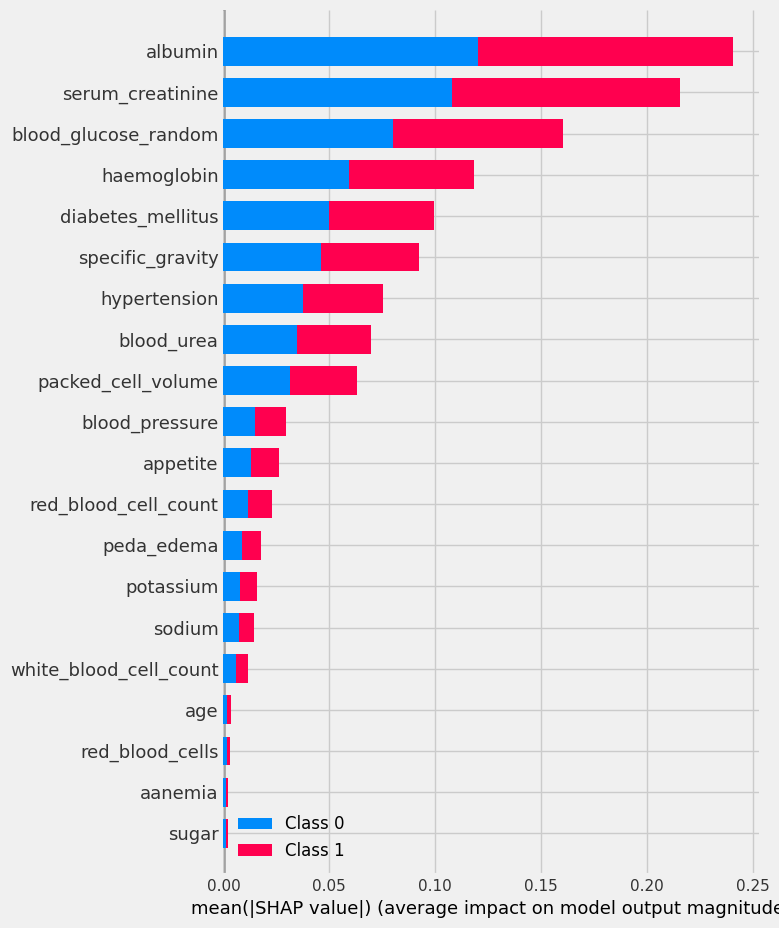

In [ ]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns, plot_type='bar')

# **Testing**

In [ ]:
import pickle

In [ ]:
filename = "Chronic_Kidney_predction_model.sav"
pickle.dump(RandomForestclassifier, open(filename, "wb"))

In [ ]:
loaded_model = pickle.load(open("Chronic_Kidney_predction_model.sav", "rb"))

In [ ]:
#input_values =(56,2,2,2,1,1,1,1,1,1,1,2,2,1)
# 160	12.00	5.73	23.11	Present	49	25.30	97.20	52	1
input_values = (160,12.00,5.73,23.11,1,49,25.30,97.20,52,34.6,65.4,50,35,23,89.9,65.4,23,12,34,67,44.4,55,87.5,70)

input_values_as_numpy_array = np.asarray(input_values)
input_values_reshaped = input_values_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_values_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("This Person doed not have Chronic Kidney Diseases .")
else:
    print("This Preson has Chronic Kidney Diseases.")

[0]
This Person doed not have Chronic Kidney Diseases .


**Using K-Nearest Neighbors Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(x_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(x_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(x_test))}")

Training Accuracy of KNN is 0.9535714285714286
Test Accuracy of KNN is 0.9583333333333334 

Confusion Matrix :- 
[[71  5]
 [ 0 44]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.93      0.97        76
           1       0.90      1.00      0.95        44

    accuracy                           0.96       120
   macro avg       0.95      0.97      0.96       120
weighted avg       0.96      0.96      0.96       120



**Using Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(x_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.9833333333333333 

Confusion Matrix :- 
[[75  1]
 [ 1 43]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        76
           1       0.98      0.98      0.98        44

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



**Using XgBoost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Create an XGBoost Classifier
xgb = XGBClassifier(objective='binary:logistic', learning_rate=0.5, max_depth=5, n_estimators=150)

# Define the hyperparameters to tune
param_grid = {
    'learning_rate': [0.1, 0.5, 1.0],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 150, 200],
    'min_child_weight': [1, 3, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best classifier and its performance
best_xgb = grid_search.best_estimator_
best_xgb_acc = accuracy_score(y_test, best_xgb.predict(x_test))

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Training Accuracy of XGBoost: {accuracy_score(y_train, best_xgb.predict(x_train))}")
print(f"Test Accuracy of XGBoost: {best_xgb_acc}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, best_xgb.predict(x_test))}\n")
print(f"Classification Report:\n{classification_report(y_test, best_xgb.predict(x_test))}")


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100}
Training Accuracy of XGBoost: 0.9892857142857143
Test Accuracy of XGBoost: 0.9833333333333333

Confusion Matrix:
[[74  2]
 [ 0 44]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        76
           1       0.96      1.00      0.98        44

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



In [ ]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'XgBoost' ],
    'Score' : [knn_acc, dtc_acc, best_xgb_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,Decision Tree Classifier,0.983333
2,XgBoost,0.983333
0,KNN,0.958333


In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark',
       title = 'Models Comparison')